In [31]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
tf.__version__

'2.3.0'

In [4]:
keras.__version__

'2.4.0'

# **Image Classifier using the Sequential API**
- Using Fashion MNIST

In [3]:
  #Loading the dataset
  fashion_mnist = keras.datasets.fashion_mnist
  (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
#Creating scaled validation and train sets
X_val, X_train = X_train_full[:5000]/255.0, X_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

- Creating the model

In [7]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation='relu'),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

### **Points to note:** 
- Sequential model provides a single stack of layers connected sequentially.
- **Flatter layer** - 1st layer of the model.
  - Converts each input image into a 1D array.
  - i.e if it receives input data X , it computes X.reshape(-1, 1).
  - can also use **keras.layers.InputLayer**.
- **Dense Layer** - Manages own weight matrix (connection weights) of 300 neurons + bias neuron and the inputs.
- **Output Layer (Dense)** - 10 neurons which predict the class using the softmax activation function.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
hidden2 = model.layers[2]
print(hidden2.name)
model.get_layer('dense_1') is hidden2

dense_1


True

In [11]:
weights, biases = hidden2.get_weights()

In [12]:
weights
#Weights randomly initialized to break symmetry

array([[-0.02917467,  0.00286523, -0.10587546, ...,  0.11216355,
        -0.11815788,  0.06023564],
       [ 0.06502882,  0.02196876, -0.07664464, ...,  0.0979246 ,
         0.02710102, -0.05366995],
       [ 0.03592055,  0.12227464,  0.07437467, ..., -0.02456796,
         0.0236944 , -0.02573381],
       ...,
       [-0.07869992, -0.11819616,  0.02355132, ..., -0.05917171,
         0.02217358,  0.05246992],
       [ 0.04570452, -0.08791241,  0.06829647, ...,  0.04619998,
         0.0023229 ,  0.00632677],
       [ 0.0850876 , -0.11626717,  0.02760143, ..., -0.06136406,
         0.00590556, -0.063309  ]], dtype=float32)

In [13]:
weights.shape

(300, 100)

- Compiling the model
  - We use sparse_categorical_crossentropy since we have sparse labels i.e for each instance there is just a target class index (0-9)
  - if we were using one-hot vectors (then we can use categorical_crossentropy)
  - For binary classification, we can use binary_crossentropy loss

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7382 - accuracy: 0.7586 - val_loss: 0.5186 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4912 - accuracy: 0.8295 - val_loss: 0.4732 - val_accuracy: 0.8290
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4462 - accuracy: 0.8435 - val_loss: 0.4186 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4175 - accuracy: 0.8535 - val_loss: 0.4231 - val_accuracy: 0.8522
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3965 - accuracy: 0.8612 - val_loss: 0.4003 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3803 - accuracy: 0.8663 - val_loss: 0.3708 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3670 - accuracy: 0.8702 - val_loss: 0.3784 - val_accuracy:

- *class_weight* param in fit() can help give a larger weight to underrepresented classes and a lower weight to overrepresented classes.
  - These weights are used by Keras when computing the loss

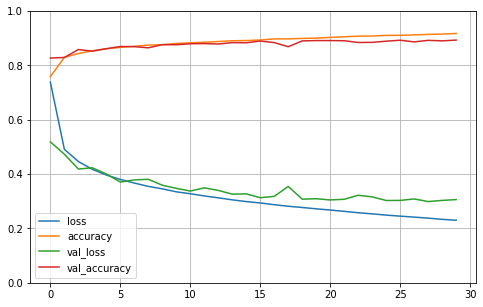

In [19]:
pd.DataFrame(hist.history).plot(figsize=(8, 5)) #hist.history contains the loss and other extra metrics. Can plot the learning curves with this.
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- Both the training accuracy and the validation accuracy
steadily increase during training, while the training loss and the validation
loss decrease.
- When plotting the training curve, it should be shifted by half an epoch to the left.

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8754


[0.3486558496952057, 0.8754000067710876]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
  y_model = model.predict_classes(X_new)
  y_model

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [30]:
np.array(class_names)[y_model]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

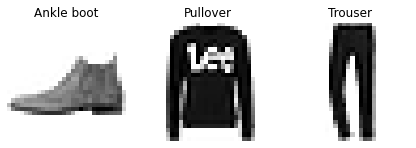

In [24]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# **Regression MLP using Sequential**

In [32]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

- The main differences between reg and clf model designs are:
  - o/p layer has a single neuron (since we're predicting a single value)
  - uses no activation function
  - loss function used: mean squared error

In [42]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])

In [43]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [44]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.8674 - val_loss: 0.5168
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4956 - val_loss: 0.4494
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4492 - val_loss: 0.4295
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4300 - val_loss: 0.4167
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4205 - val_loss: 0.4042
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4139 - val_loss: 0.3947
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4095 - val_loss: 0.3932
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4033 - val_loss: 0.4148
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4102 - val_loss: 0.3863
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3952 - val_loss: 0.3829

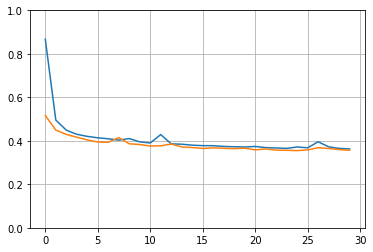

In [45]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 867us/step - loss: 0.3614


0.36143454909324646

In [48]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred

array([[1.7458103],
       [1.8336592],
       [1.9972527]], dtype=float32)